# Analysis notebook: `SU2020a_signal_onspill-LH_au`  

## Define analysis name

In [1]:
ana_label = "SU2020a_signal_onspill-LH_au"

## Preamble

In [2]:
import sys
sys.path.append("..")
from preamble import *

## Load data

In [3]:
!ls ../../../output/results/SU2020a_signal_onspill-LH_au

analysis.csv	results.pkl
cut_flow.csv	SU2020a_signal_onspill-LH_au.log
efficiency.csv	SU2020a_signal_onspill-LH_au.yaml
hists.h5


In [4]:
loader = Load(
    in_path = f"../../../output/results/{ana_label}"
)

[Load] ✅ Initialised with out_path=../../../output/results/SU2020a_signal_onspill-LH_au


In [5]:
results = loader.load_pkl() 
results_from_persistent = loader.load_all() # Persistent backup 

[Load] ✅ Successfully loaded results from ../../../output/results/SU2020a_signal_onspill-LH_au/results.pkl
[Load] ✅ Loaded cut stats from ../../../output/results/SU2020a_signal_onspill-LH_au/cut_flow.csv
[Load] ✅ Loaded histograms from ../../../output/results/SU2020a_signal_onspill-LH_au/hists.h5
[Load] ✅ Loaded analysis info from ../../../output/results/SU2020a_signal_onspill-LH_au/analysis.csv
[Load] ⚠️ File not found: ../../../output/results/SU2020a_signal_onspill-LH_au/events.parquet
[Load] ⚠️ File not found: ../../../output/results/SU2020a_signal_onspill-LH_au/info.txt


## Analyse results

### Cut flow

In [6]:
display(results["cut_flow"].round(3))

,Cut,Group,Events Passing,Absolute [%],Relative [%],Description
0,No cuts,NaN,1454548,100.000,100.000,No selection applied
1,has_trk_front,Preselect,1454280,99.982,99.982,Tracks intersect tracker entrance
2,is_reco_electron,Preselect,1428881,98.235,98.254,Electron track fits
3,is_downstream,Preselect,1428761,98.227,99.992,Downstream tracks (p_z > 0 at tracker entrance)
4,one_reco_electron,Preselect,1424823,97.956,99.724,One reco electron / event
5,is_truth_electron,Preselect,1424821,97.956,100.000,Track parents are electrons (truth PID)
6,good_trkqual,Tracker,791143,54.391,55.526,Track fit quality > 0.8
7,within_t0,Tracker,572014,39.326,72.302,t0 at tracker entrance (640 < t_0 < 1650 ns)
8,has_hits,Tracker,568243,39.067,99.341,>20 active tracker hits
9,within_t0err,Tracker,324329,22.298,57.076,Track fit t0 uncertainty (t0err < 0.9 ns)


### Efficiency & rates

In [7]:
display(results["analysis"].round(3))

,Type,CE-like (wide),CE-like (ext),CE-like (sig),No veto (wide),No veto (ext),No veto (sig)
0,k,289344,277063,215096,0,0,0
1,N,4000000,4000000,4000000,289344,277063,215096
2,Eff [%],7.2336,6.926575,5.3774,100.0,100.0,100.0
3,Eff Err$-$ [%],-0.012941,-0.012685,-0.011267,-0.000346,-0.000361,-0.000465
4,Eff Err$+$ [%],0.012963,0.012706,0.01129,0.0,0.0,0.0
5,Rate 1B [$\text{day}^{-1}$],289344.0,277063.0,215096.0,0.0,0.0,0.0
6,Rate 1B Err$-$ [$\text{day}^{-1}$],-534.929287,-523.45392,-461.217412,0.0,0.0,0.0
7,Rate 1B Err$+$ [$\text{day}^{-1}$],535.922843,524.447495,462.211115,1.139434,1.139434,1.139434
8,Rate 2B [$\text{day}^{-1}$],289344.0,277063.0,215096.0,0.0,0.0,0.0
9,Rate 2B Err$-$ [$\text{day}^{-1}$],-534.929287,-523.45392,-461.217412,0.0,0.0,0.0


### Histograms

In [8]:
# Setup draw for this cutset
on_spill = "offspill" not in ana_label
draw = Draw(cutset_name=ana_label.split('_')[0], on_spill=on_spill)
# Define image directory
img_dir = f"../../../output/images/{ana_label}"
os.makedirs(img_dir, exist_ok=True)

[Plot] ⭐️ Initialised


[Plot] ✅ 	Wrote ../../../output/images/SU2020a_signal_onspill-LH_au/h1o_1x3_mom_windows.png


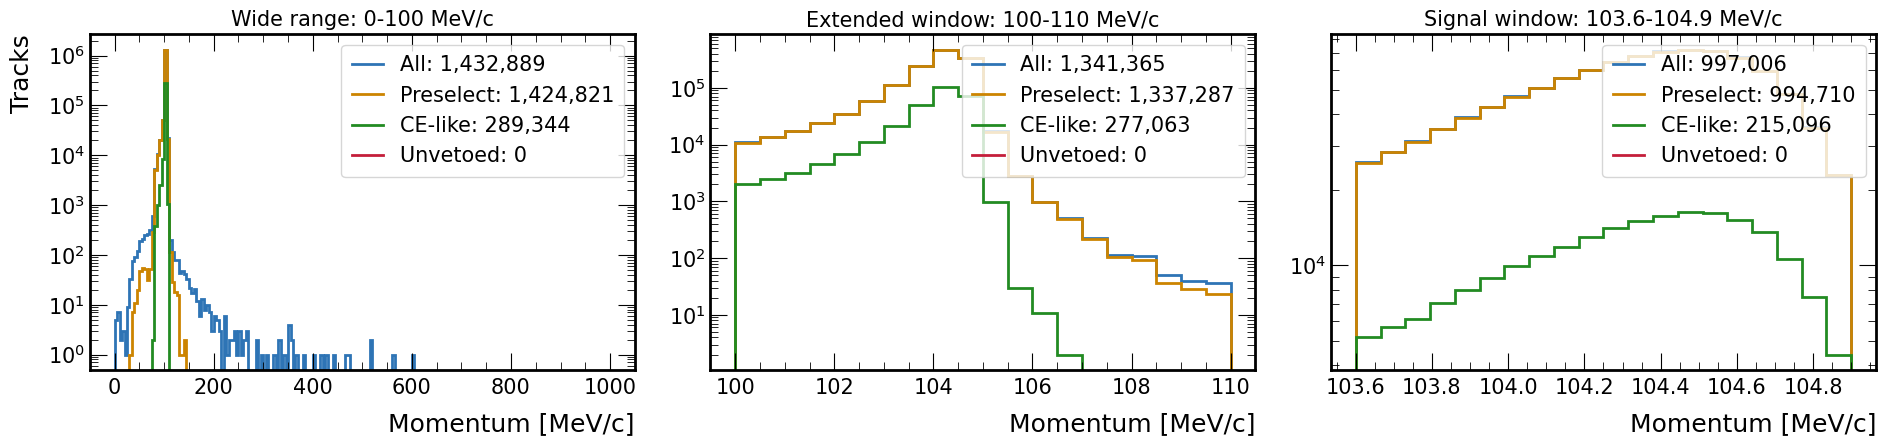

In [9]:
draw.plot_mom_windows(results["hists"], out_path=f"{img_dir}/h1o_1x3_mom_windows.png") 

[Plot] ✅ 	Wrote ../../../output/images/SU2020a_signal_onspill-LH_au/h1o_3x3_summary.png


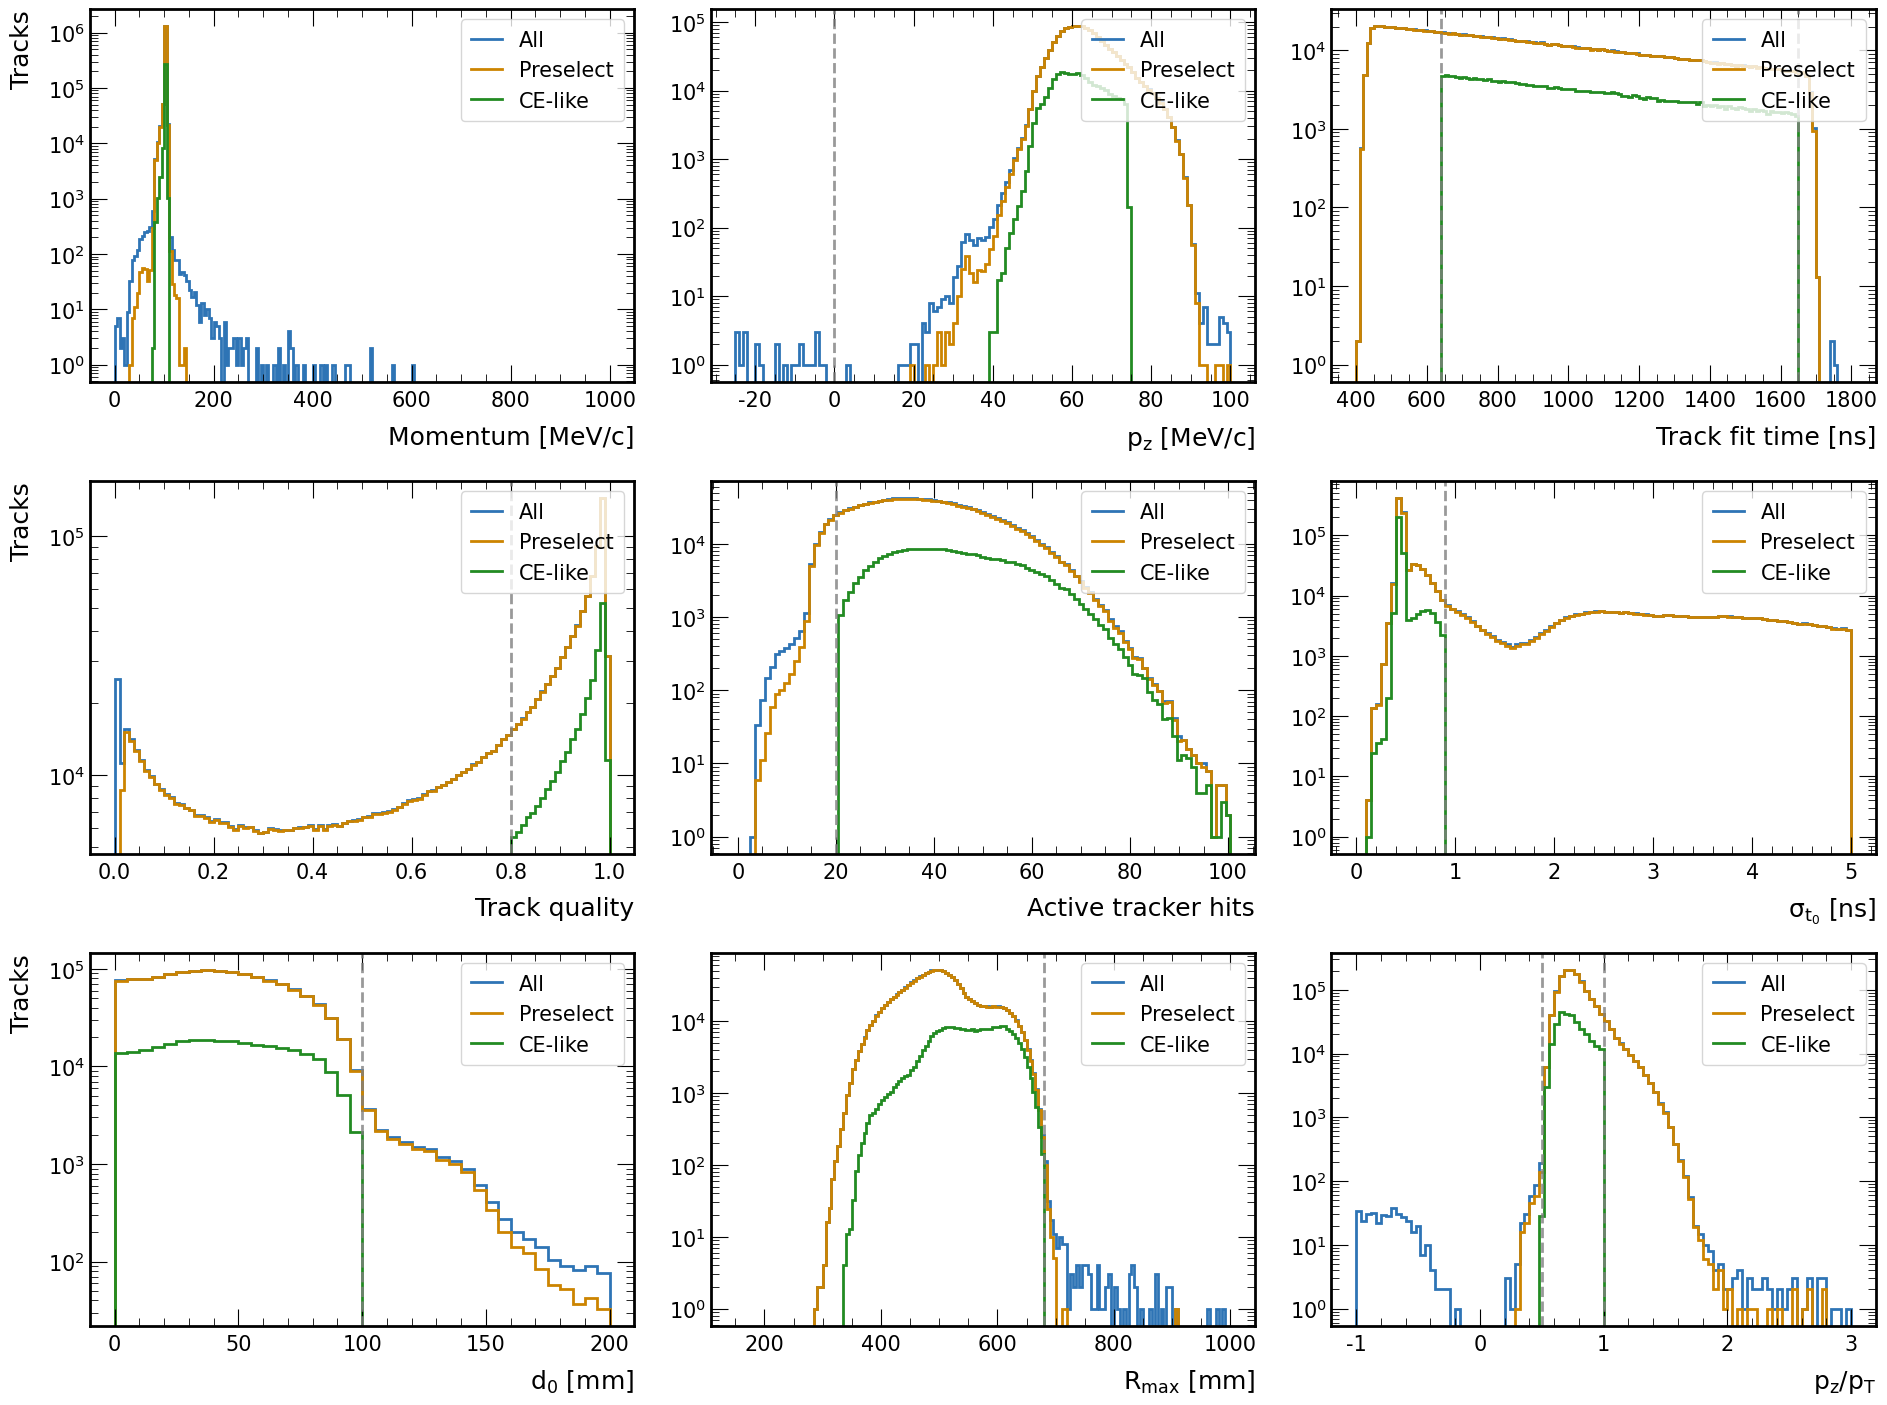

In [10]:
draw.plot_summary(results["hists"], out_path=f"{img_dir}/h1o_3x3_summary.png")

[Plot] ✅ 	Wrote ../../../output/images/SU2020a_signal_onspill-LH_au/h1o_crv_z.png


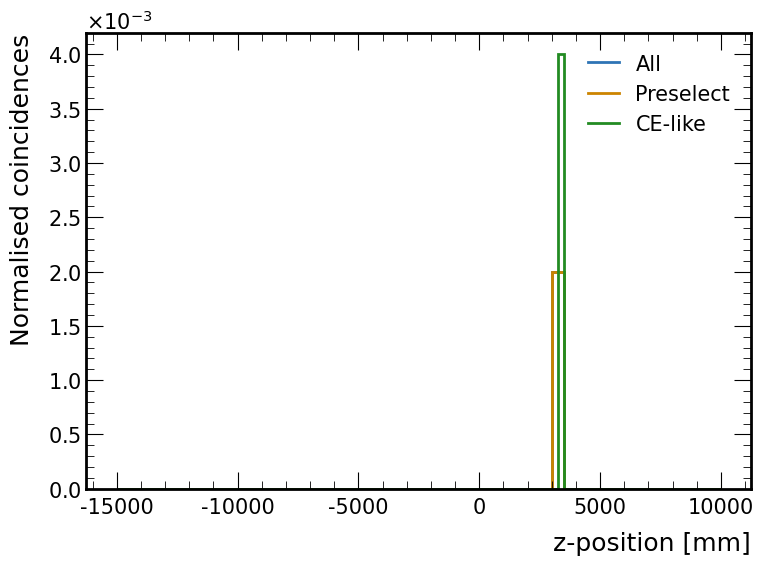

In [11]:
draw.plot_crv_z(results["hists"], out_path=f"{img_dir}/h1o_crv_z.png") 

### Background event info

In [12]:
print(results["event_info"])

None


In [13]:
if results["events"] is not None:
    from pyutils.pyprint import Print
    printer = Print()
    printer.print_n_events(results["events"], n_events = len(results["events"]))